In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Support Vector Machine (SVM) classifier
**Learning goals**
- You will understand the concept and be ablr to use a support vector machine classifier.

A decision boundary used for binary classification.

![](images/svm-vline.webp)

Optimal boundary maximizes the distance between each class (margin).

![](images/svm-dline.webp)

![](images/svm-margin-support-vectors.png)

Multinomial one-vs-one classification with SVM.

![](images/svm-2vs3-classes.png)

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [3]:
import pandas as pd
df = pd.read_csv('data/Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

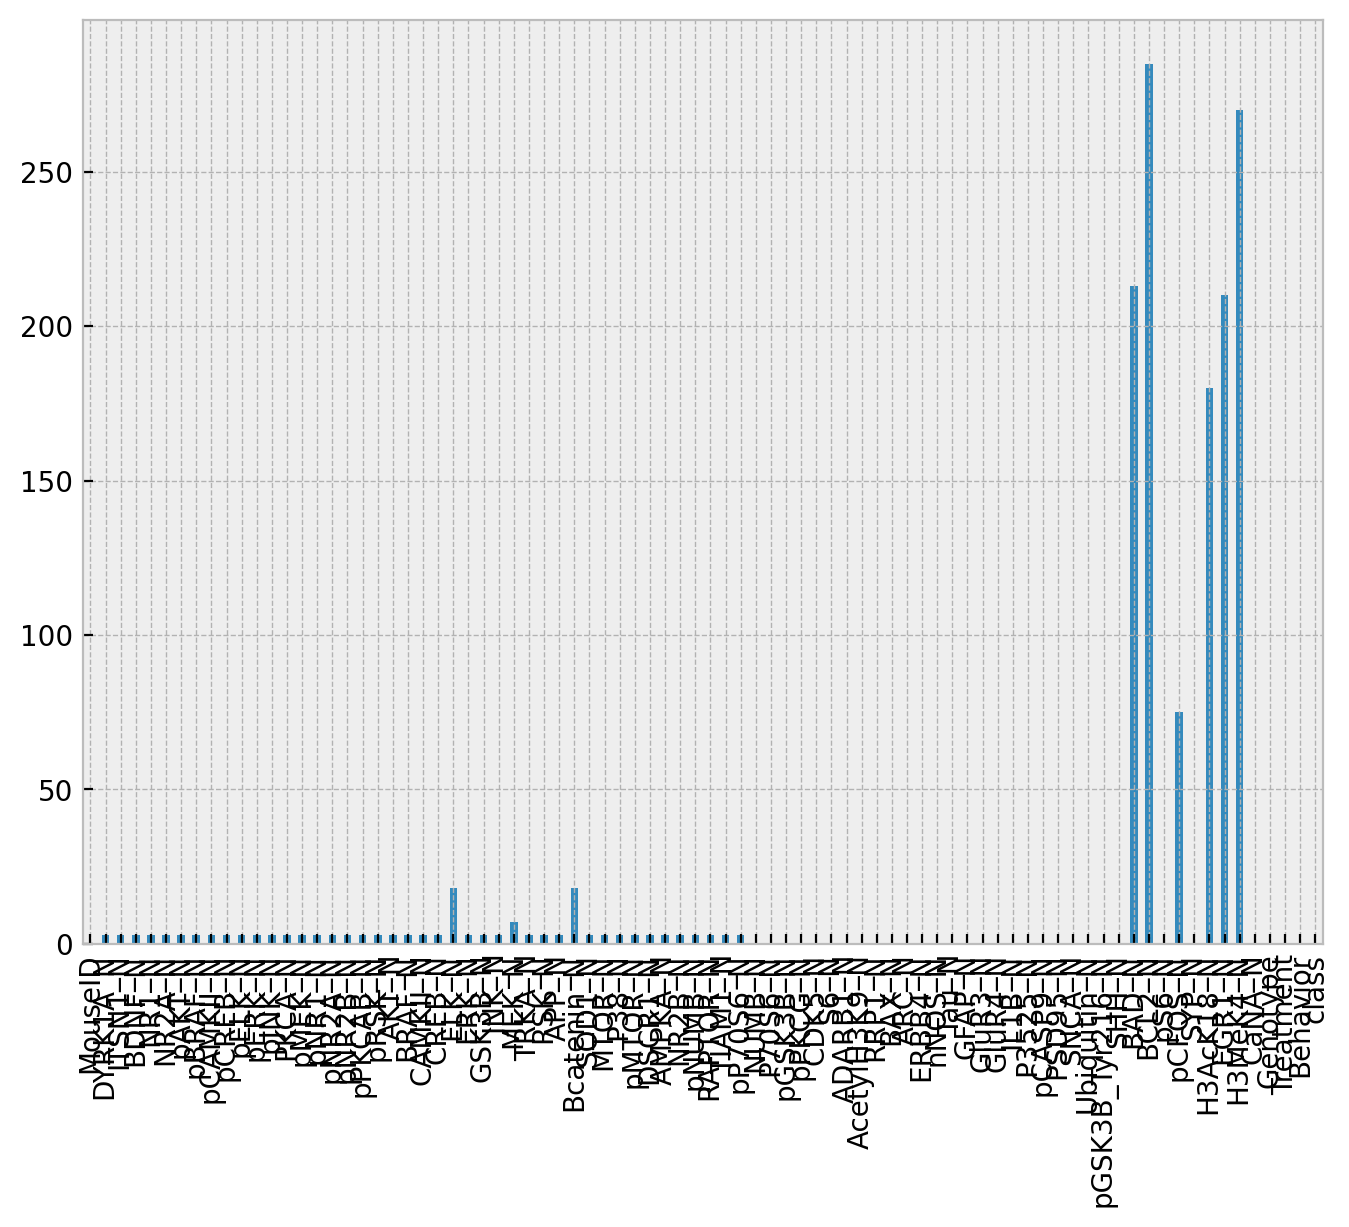

In [4]:
df.isnull().sum().plot.bar();

In [5]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [6]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [7]:
# discard mice with missing measurements
df2 = df2.dropna()

df2.shape

(1073, 74)

The dataset we will use for building a classsification model.

In [8]:
df2

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Use an SVM classifier to predict mouse class based on protein expression in cortex.

In [9]:
from sklearn.utils import shuffle

X = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = df2['class']

# shuffle data
X, y = shuffle(X, y, random_state=0)

X.shape, y.shape, y.unique()

((1073, 69),
 (1073,),
 array(['t-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 'c-CS-s', 't-SC-s',
        't-SC-m', 'c-CS-m'], dtype=object))

In [10]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

Get cross validated accuracy.

In [16]:
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
cv_accuracy

array([0.9537037 , 0.94444444, 0.91666667, 0.96261682, 0.96261682,
       0.93457944, 0.97196262, 0.94392523, 0.94392523, 0.92523364])

Mean accuracy across folds is likely a reasonable measure of the model's accuracy.

In [17]:
accuracy = np.mean(cv_accuracy)
accuracy

0.9459674627898927

Get cross validated predictions.

In [20]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X, y, cv=10)

y.shape, y_pred.shape

((1073,), (1073,))

Plot a confusion matrix.

*Note that results are already a bit better than the logistic regression model from the last lecture.*

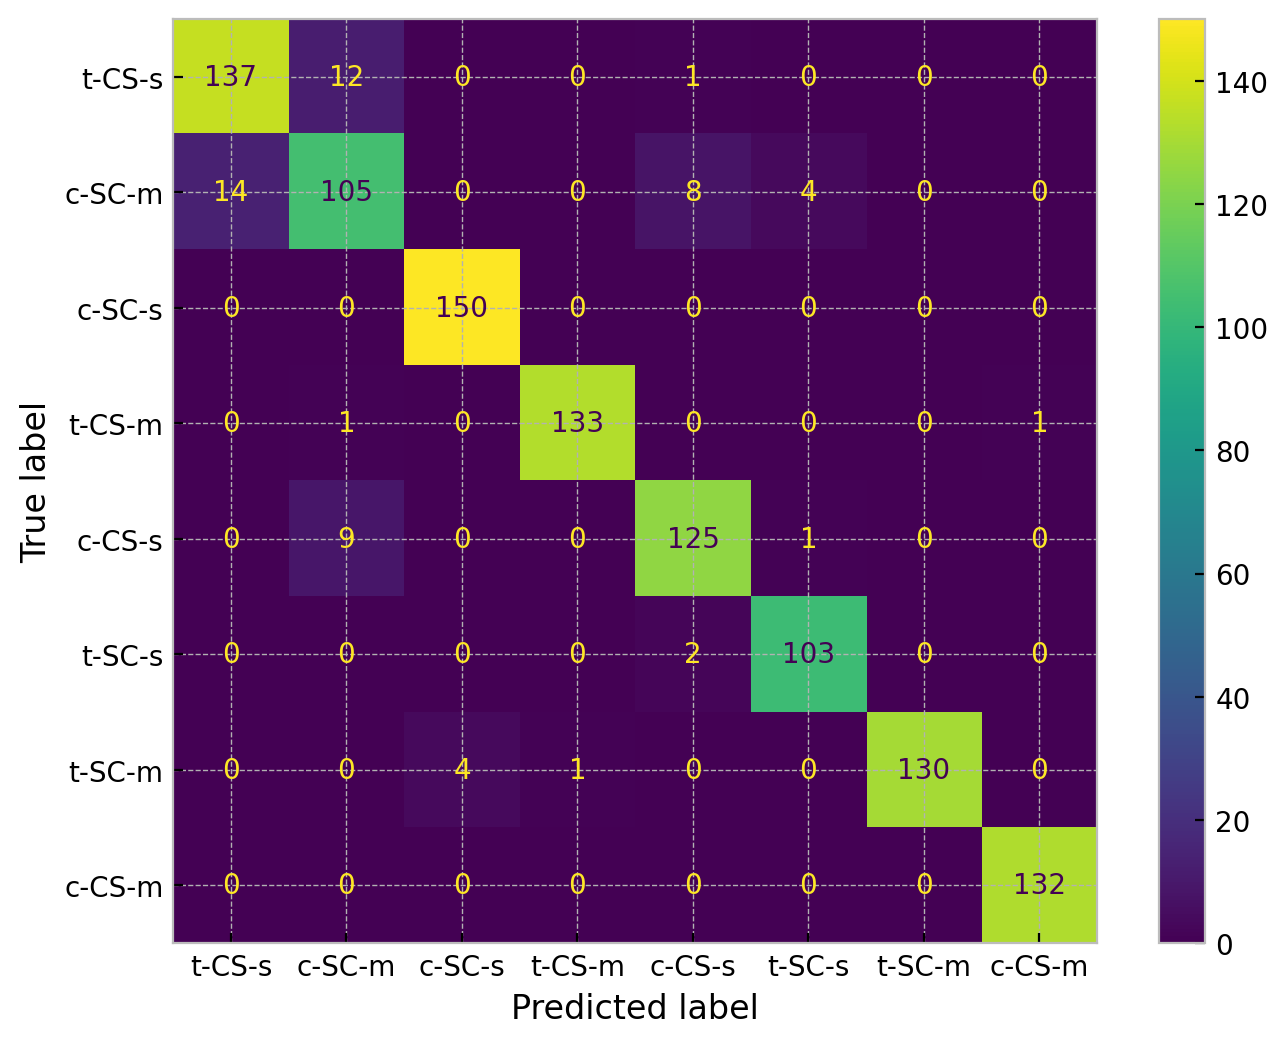

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique()).plot();

**Soft margin** allows for misclassifications in the training set. The penalty for missclassifications is scaled by a hyperparameter `C` which sets a compromise between missclassifications and maximizing the margin.

* **left**: Larger penalty for missclassifications.
* **right**: Smaller penalty for missclassifications.

![](images/svm-largeC-vs-smallC.png)

### Exercise

Determine the optimal value of the penalty `C` for predicting a mouse's class based on its cortical protein expression profile. 

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # SVM linear classifier
# model = ...

# # try these values for the penalty C
# params = {'C': np.logspace(-1, 2, 30)}

# # setup grid search cross validation to find best C
# search = ...

# # do the search
# ...

# best_C = search.best_params_['C']
# best_model = search.best_estimator_
# best_model

### Exercise key

Determine the optimal value of the penalty `C` for predicting a mouse's class based on its cortical protein expression profile. 

In [23]:
from sklearn.model_selection import GridSearchCV

# SVM linear classifier
model = SVC(kernel='linear')

# try these values for the penalty C
params = {'C': np.logspace(-1, 2, 30)}

# setup grid search cross validation to find best C
search = GridSearchCV(model, params, cv=10, scoring='accuracy')

# do the search
search.fit(X, y)

best_C = search.best_params_['C']
best_model = search.best_estimator_
best_model

SVC(C=23.95026619987486, kernel='linear')

Plot a confusion matrix for the SVM model with optimal soft margin penalty.

*This is an improvement over the default penalty.*

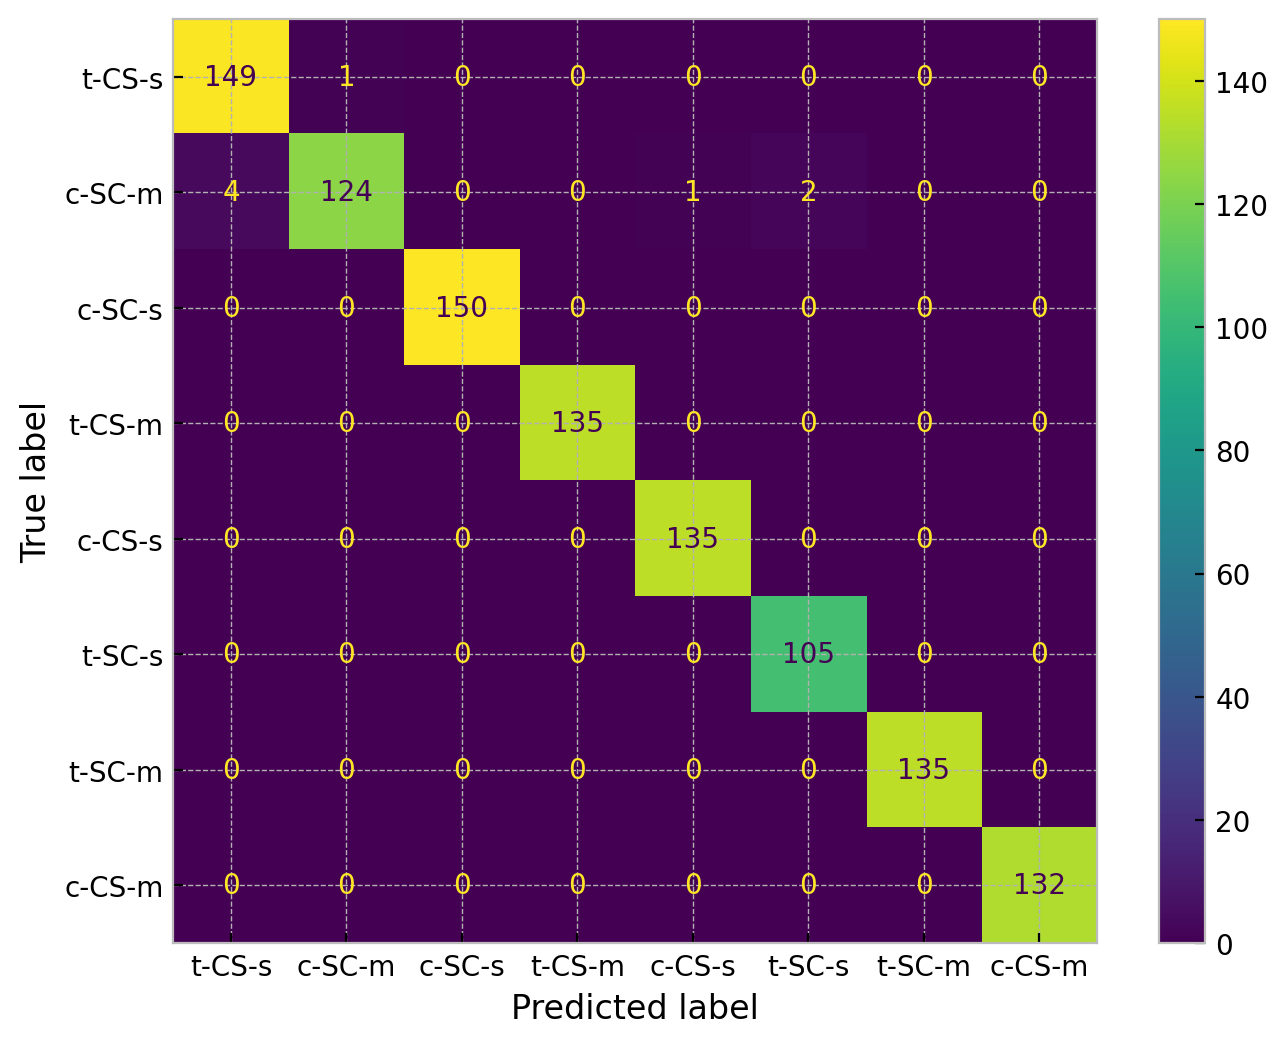

In [24]:
y_pred = cross_val_predict(best_model, X, y, cv=10)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique()).plot();

Model with optimal penalty.

In [26]:
cv_accuracy = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
accuracy = np.mean(cv_accuracy)
accuracy

0.9925233644859814

Model with very small penalty.

In [27]:
small_penalty_model = SVC(kernel='linear', C=1e-9)
cv_accuracy = cross_val_score(small_penalty_model, X, y, cv=10, scoring='accuracy')
accuracy = np.mean(cv_accuracy)
accuracy

0.23948598130841123

SVM can incorporate nonlinear decision boundaries. In `sklearn.svm.SVC` this is set via the `kernel` parameter.

![](images/svm-linear-vs-nonlinear.png)

SVM polynomial kernel.

![](images/svm-poly-mapping.webp)

SVM nonlinar boundary.

![](images/svm-nonlinear-mapping.png)

Contour boundaries.

![](images/svm-kernel.jpeg)

A decent video explaining the basics of SVM classfiers.

https://www.youtube.com/watch?v=efR1C6CvhmE&t=0s

Some made-up data to illustrate a nonlinear boundary in two dimensions.

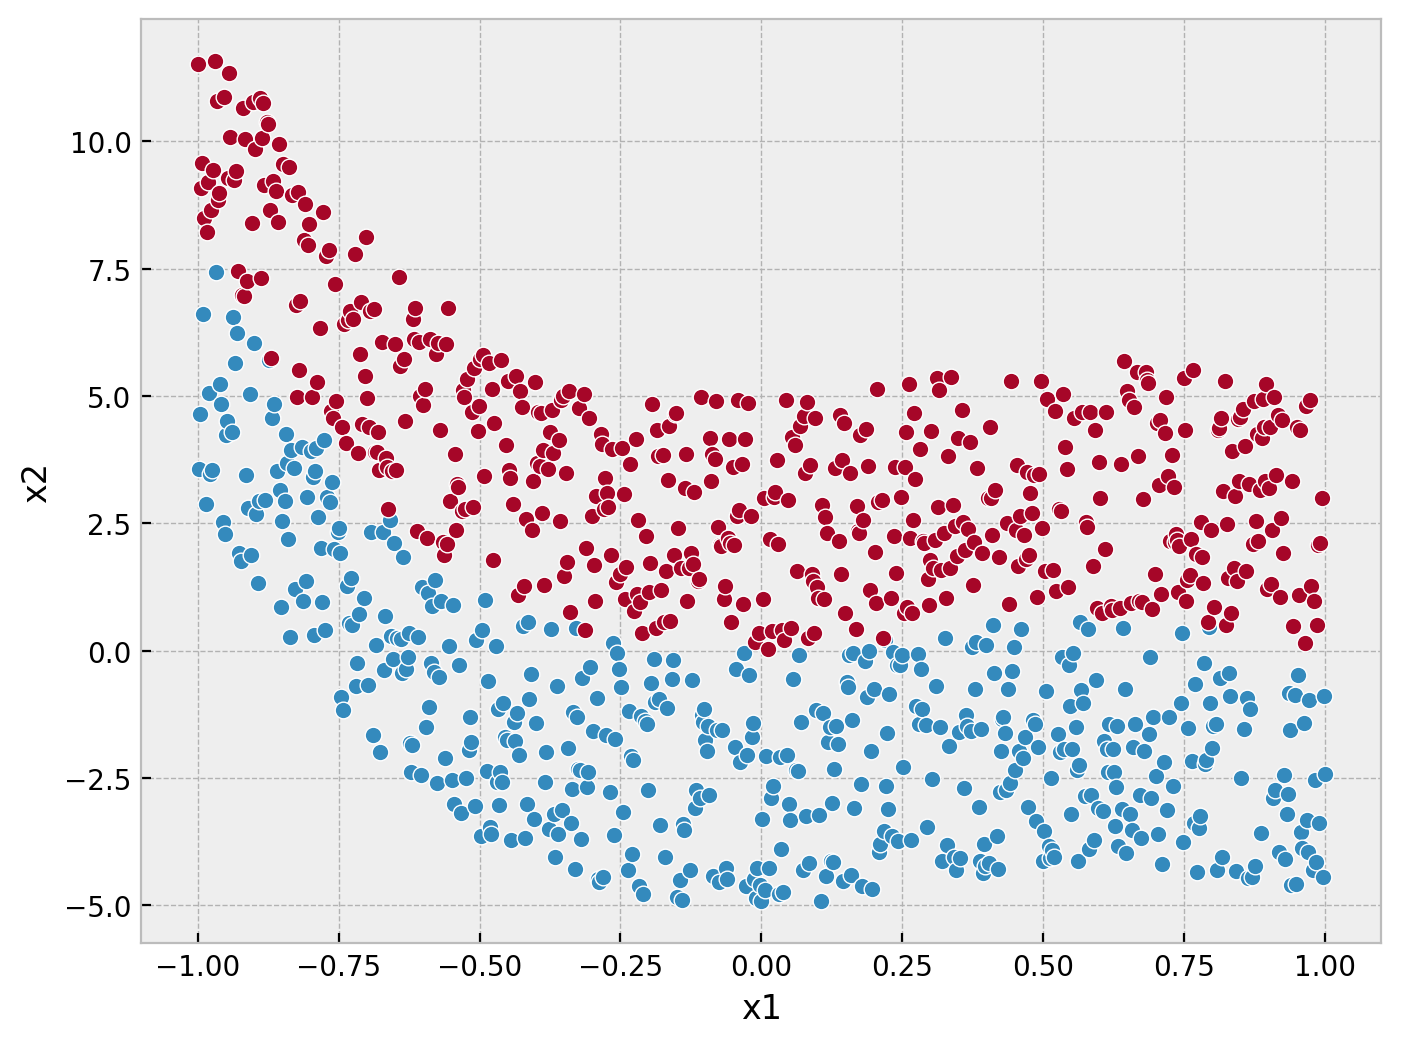

In [28]:
np.random.seed(80)
x1 = np.linspace(-1, 1, 1000)
a, b, c = np.random.uniform(-10, 10, 3)
m = a * x1 + b * x1**2 + c * x1**3
x2 = m + np.random.uniform(0, 5, x1.shape) * np.random.choice([-1, 1], x1.shape)
y = np.zeros(len(x1))
y[x2 > m] = 1

plt.plot(x1[y == 0], x2[y == 0], 'o')
plt.plot(x1[y == 1], x2[y == 1], 'o')
plt.xlabel('x1')
plt.ylabel('x2');

In [29]:
X = np.vstack([x1, x2]).T

X.shape, y.shape

((1000, 2), (1000,))

Radial Basis Function (RBF) kernel ~ Gaussian kernel

In [30]:
from sklearn.model_selection import GridSearchCV

model = SVC(kernel='rbf')
params = {'C': np.logspace(-1, 3, 40)}

search = GridSearchCV(model, params, cv=10, scoring='accuracy')
search.fit(X, y)

best_model = search.best_estimator_
best_model

SVC(C=388.81551803080856)

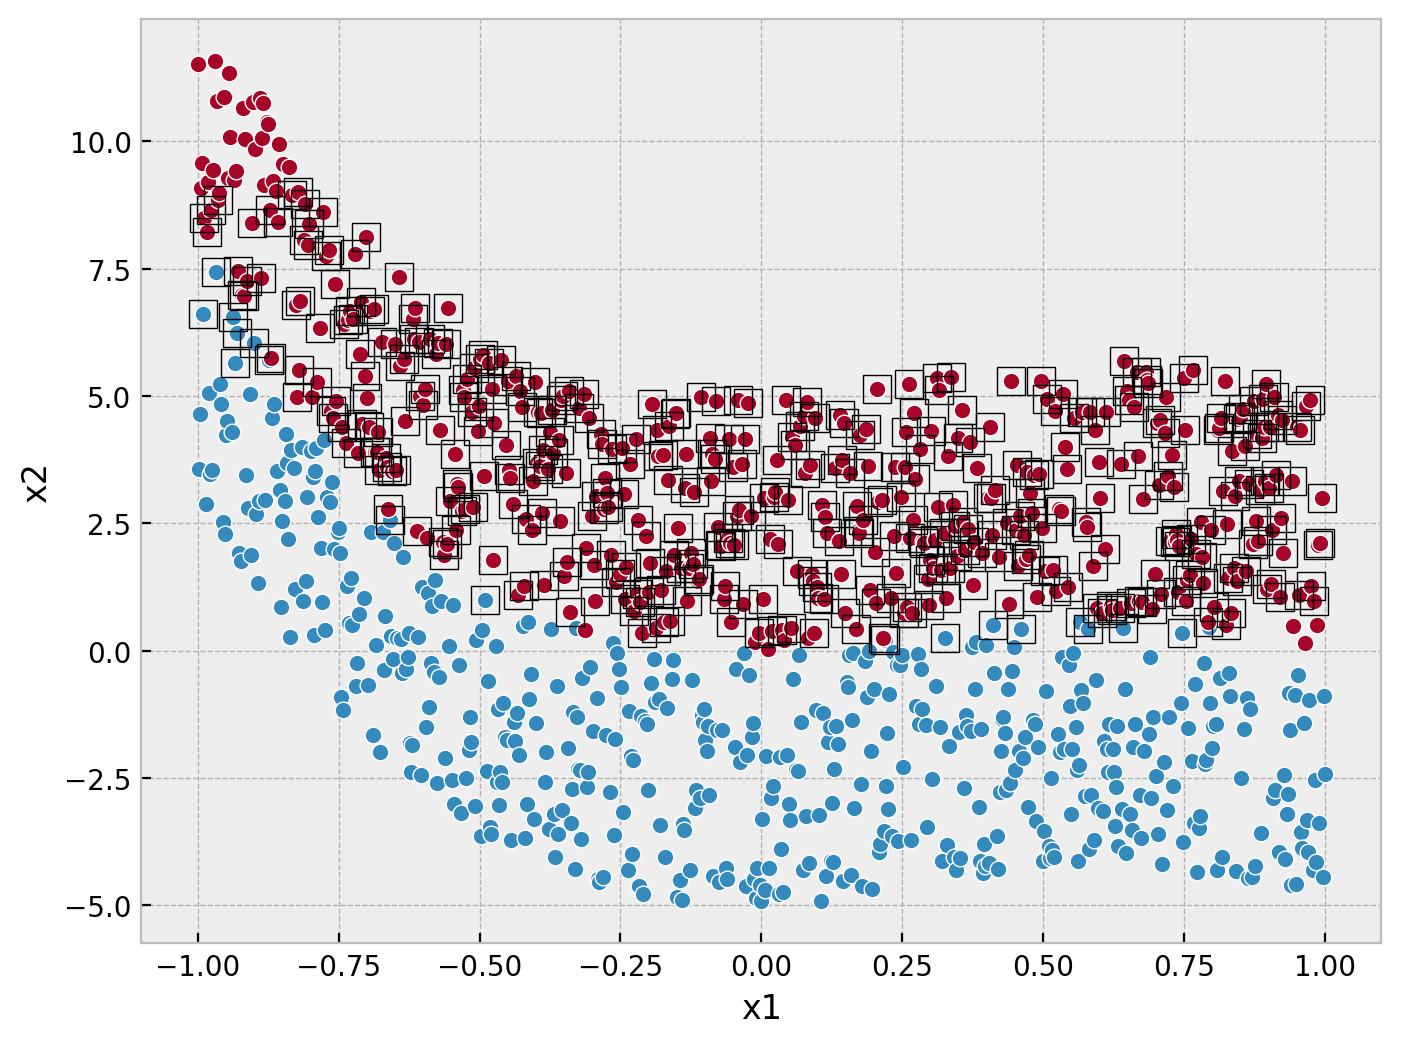

In [31]:
y_pred = cross_val_predict(best_model, X, y, cv=10)

plt.plot(x1[y == 0], x2[y == 0], 'o')
plt.plot(x1[y == 1], x2[y == 1], 'o')
plt.plot(x1[y_pred == 1], x2[y_pred == 1], 's', ms=10, mfc='none', mec='k')
plt.xlabel('x1')
plt.ylabel('x2');

### Exercise

Use an SVM classifier with a radial basis function kernel to predict a mouse's class based on its cortical protein expression profile.

In [32]:
X = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = df2['class']

X, y = shuffle(X, y, random_state=0)

X.shape, y.shape, y.unique()

((1073, 69),
 (1073,),
 array(['t-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 'c-CS-s', 't-SC-s',
        't-SC-m', 'c-CS-m'], dtype=object))

In [ ]:
# model = ...
# params = {'C': np.logspace(-1, 3, 40)}

# search = ...
# ...

# best_model = search.best_estimator_
# best_model

### Exercise key

Use an SVM classifier with a radial basis function kernel to predict a mouse's class based on its cortical protein expression profile.

In [32]:
X = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = df2['class']

X, y = shuffle(X, y, random_state=0)

X.shape, y.shape, y.unique()

((1073, 69),
 (1073,),
 array(['t-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 'c-CS-s', 't-SC-s',
        't-SC-m', 'c-CS-m'], dtype=object))

In [33]:
model = SVC(kernel='rbf')
params = {'C': np.logspace(-1, 3, 40)}

search = GridSearchCV(model, params, cv=10, scoring='accuracy')
search.fit(X, y)

best_model = search.best_estimator_
best_model

SVC(C=94.26684551178855)

Let's use a confusion matrix to visualize how well the SVM model with radial basis function did.

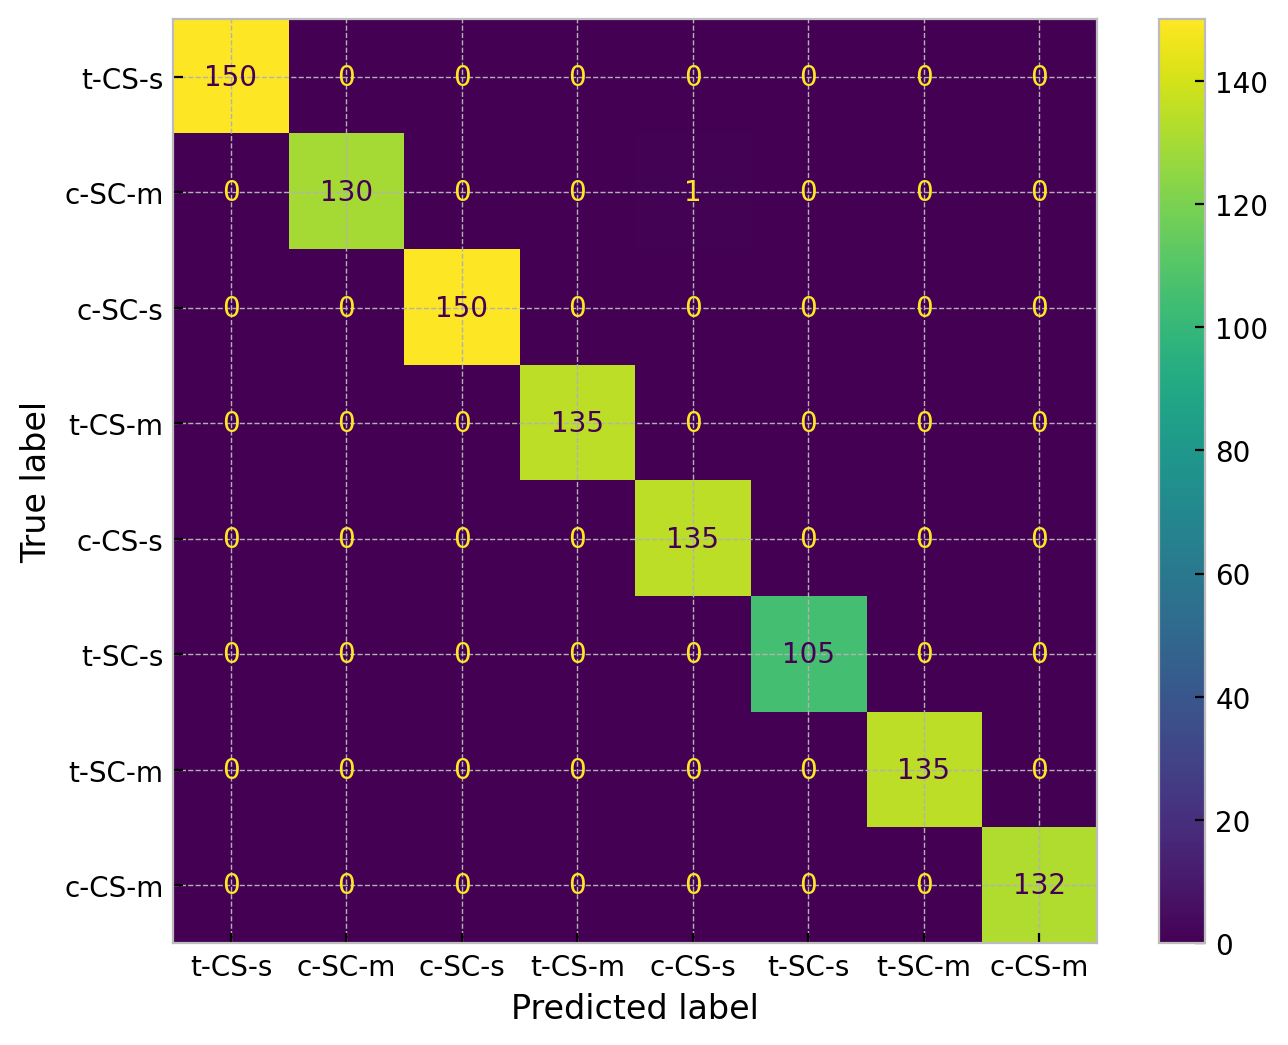

In [34]:
y_pred = cross_val_predict(best_model, X, y, cv=10)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique()).plot();

And the model's cross validated accuracy...

In [35]:
cv_accuracy = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
accuracy = np.mean(cv_accuracy)
accuracy

0.9990654205607477

Just a reminder, that at the end of the day once you have selected a model, you should fit it to all of your data.

In [36]:
best_model.fit(X, y);

Now you whould distribute this model to others or apply it to make predictions about new data.